In [133]:
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [48]:
SandP500 = pd.read_csv("S&P500.csv")
NASDAQ = pd.read_csv("NASDAQ.csv")
Dow = pd.read_csv("DowJones.csv")
Russell2000 = pd.read_csv("Russell2000.csv")

SandP500_futures = pd.read_csv("S&P500_test.csv")
NASDAQ_futures = pd.read_csv("NASDAQ_test.csv")
Dow_futures = pd.read_csv("DowJones_test.csv")
Russell2000_futures = pd.read_csv("Russell2000_test.csv")

In [49]:
SandP500['ID'] =  "S&P500"
NASDAQ['ID'] = "NASDAQ"
Dow['ID'] = "Dow"
Russell2000['ID'] = "Russell2000"

SandP500_futures['ID'] =  "S&P500"
NASDAQ_futures['ID'] = "NASDAQ"
Dow_futures['ID'] = "Dow"
Russell2000_futures['ID'] = "Russell2000"

In [50]:
data = pd.concat([SandP500, NASDAQ, Dow, Russell2000])
futures = pd.concat([SandP500_futures, NASDAQ_futures, Dow_futures, Russell2000_futures])

In [51]:
data['Date'] = pd.to_datetime(data['Date'])
futures['Date'] = pd.to_datetime(futures['Date'])

In [52]:
train = data[['Date', 'Close*', 'ID']]
test = futures[['Date', 'Close*', 'ID']]

In [53]:
train.columns = ['ds', 'y', 'ID']
test.columns = ['ds', 'y', 'ID']

In [54]:
train['y'] = train['y'].str.replace(",", "")
test['y'] = test['y'].str.replace(",", "")

WARNING - (py.warnings._showwarnmsg) - <ipython-input-54-75c45ebedeb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = train['y'].str.replace(",", "")

WARNING - (py.warnings._showwarnmsg) - <ipython-input-54-75c45ebedeb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y'] = test['y'].str.replace(",", "")



In [55]:
train['y'] = train['y'].astype(float)
test['y'] = test['y'].astype(float)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-55-19cfdda7f78a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = train['y'].astype(float)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-55-19cfdda7f78a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y'] = test['y'].astype(float)



In [56]:
model = NeuralProphet(
    growth="off",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=31,
    num_hidden_layers=4,
    d_hidden=8,
    learning_rate=0.01
)

In [57]:
model.fit(train, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.346% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 565 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 565 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 565 NaN values in column y were auto-im

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.075198,0.343867,0.385207,0.052463,0.0
1,0.035055,0.230963,0.261641,0.024278,0.0
2,0.009174,0.101311,0.128857,0.006328,0.0
3,0.002957,0.052670,0.074566,0.002209,0.0
4,0.001952,0.042608,0.060207,0.001527,0.0
...,...,...,...,...,...
107,0.000076,0.007946,0.011868,0.000064,0.0
108,0.000076,0.007940,0.011922,0.000064,0.0
109,0.000076,0.007924,0.011940,0.000064,0.0
110,0.000076,0.007911,0.011900,0.000064,0.0


In [58]:
predictions = model.predict(test)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 79.327% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 79.327% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 79.327% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 79.327% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 78.947% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.fore

In [59]:
predictions = predictions[predictions['yhat1'].notna()]

In [60]:
Russell2000_predictions = predictions[predictions['ID'] == 'Russell2000']
SandP500_predictions = predictions[predictions['ID'] == 'S&P500']
Dow_predictions = predictions[predictions['ID'] == 'Dow']
NASDAQ_predictions = predictions[predictions['ID'] == 'NASDAQ']

In [61]:
Russell2000_predictions

,ds,y,ID,residual1,yhat1,ar1,trend
629,2022-02-03,1991.030000,Russell2000,52.9383,2043.97,151.429,1892.54
630,2022-02-04,2002.360000,Russell2000,6.99266,2009.35,116.813,1892.54
631,2022-02-05,2005.773333,Russell2000,-8.37856,1997.39,104.855,1892.54
632,2022-02-06,2009.186667,Russell2000,-4.69948,2004.49,111.948,1892.54
633,2022-02-07,2012.600000,Russell2000,-1.56655,2011.03,118.494,1892.54
...,...,...,...,...,...,...,...
892,2022-10-24,1748.400000,Russell2000,6.22268,1754.62,-137.917,1892.54
893,2022-10-25,1796.160000,Russell2000,-48.509,1747.65,-144.888,1892.54
894,2022-10-26,1804.330000,Russell2000,-12.3912,1791.94,-100.601,1892.54
895,2022-10-27,1806.320000,Russell2000,3.0572,1809.38,-83.1622,1892.54


In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
RMSE = mean_squared_error(Russell2000_predictions['y'], Russell2000_predictions['yhat1'], squared = False)

In [64]:
RMSE

28.89447716064545

In [65]:
RMSE = mean_squared_error(SandP500_predictions['y'], SandP500_predictions['yhat1'], squared = False)

In [66]:
RMSE

53.898049401276076

In [67]:
RMSE = mean_squared_error(Dow_predictions['y'], Dow_predictions['yhat1'], squared = False)

In [68]:
RMSE

360.37751083211305

In [69]:
RMSE = mean_squared_error(NASDAQ_predictions['y'], NASDAQ_predictions['yhat1'], squared = False)

In [70]:
RMSE

216.76057499062674

# Stock Index Selection

### S&P 500 Calculations

In [118]:
SandP_New = SandP500_predictions[SandP500_predictions['ds'] == datetime.datetime(2022, 10, 28)]['yhat1'].reset_index()['yhat1'][0]
SandP_Old = train[(train['ds'] == datetime.datetime(2017, 10, 27)) & (train['ID'] == "S&P500")]['y'].reset_index()['y'][0]
f"{round((SandP_New-SandP_Old)/SandP_Old*100, 2)}%"

'48.15%'

### NASDAQ Calculations

In [119]:
NASDAQ_New = NASDAQ_predictions[NASDAQ_predictions['ds'] == datetime.datetime(2022, 10, 28)]['yhat1'].reset_index()['yhat1'][0]
NASDAQ_Old = train[(train['ds'] == datetime.datetime(2017, 10, 27)) & (train['ID'] == "NASDAQ")]['y'].reset_index()['y'][0]
f"{round((NASDAQ_New-NASDAQ_Old)/NASDAQ_Old*100, 2)}%"

'61.6%'

### Dow Calculations

In [120]:
Dow_New = Dow_predictions[Dow_predictions['ds'] == datetime.datetime(2022, 10, 28)]['yhat1'].reset_index()['yhat1'][0]
Dow_Old = train[(train['ds'] == datetime.datetime(2017, 10, 27)) & (train['ID'] == "Dow")]['y'].reset_index()['y'][0]
f"{round((Dow_New-Dow_Old)/Dow_Old*100, 2)}%"

'36.54%'

### Russell 2000 Calculations

In [116]:
Russell_New = Russell2000_predictions[Russell2000_predictions['ds'] == datetime.datetime(2022, 10, 28)]['yhat1'].reset_index()['yhat1'][0]
Russell_Old = train[(train['ds'] == datetime.datetime(2017, 10, 27)) & (train['ID'] == "Russell2000")]['y'].reset_index()['y'][0]
f"{round((Russell_New-Russell_Old)/Russell_Old*100, 2)}%"

'20.11%'

# Graphs

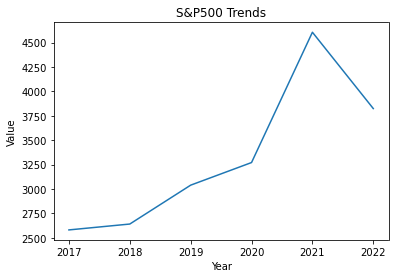

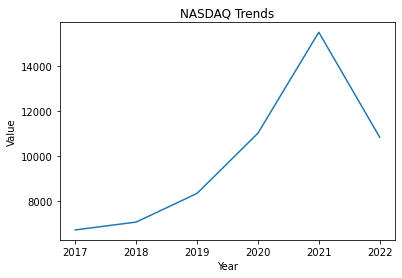

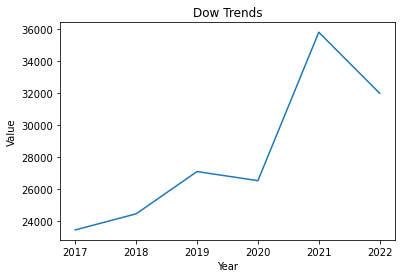

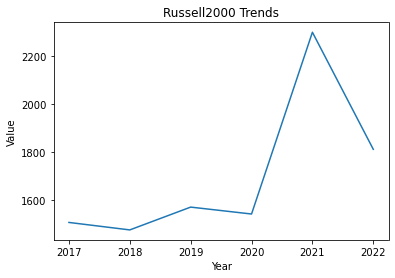

<Figure size 432x288 with 0 Axes>

In [140]:
stock_indexes = list(train['ID'].unique())
for stock_index in stock_indexes:
    points = []
    points.append(train[(train['ds'] == datetime.datetime(2017, 10, 27)) & (train['ID'] == stock_index)]['y'].reset_index()['y'][0])
    points.append(train[(train['ds'] == datetime.datetime(2018, 10, 29)) & (train['ID'] == stock_index)]['y'].reset_index()['y'][0])
    points.append(train[(train['ds'] == datetime.datetime(2019, 10, 28)) & (train['ID'] == stock_index)]['y'].reset_index()['y'][0])
    points.append(train[(train['ds'] == datetime.datetime(2020, 10, 28)) & (train['ID'] == stock_index)]['y'].reset_index()['y'][0])
    points.append(train[(train['ds'] == datetime.datetime(2021, 10, 29)) & (train['ID'] == stock_index)]['y'].reset_index()['y'][0])
    if stock_index == "S&P500":
        points.append(SandP_New)
    elif stock_index == "NASDAQ":
        points.append(NASDAQ_New)
    elif stock_index == "Dow":
        points.append(Dow_New)
    elif stock_index == "Russell2000":
        points.append(Russell_New)
    plt.plot([2017,2018,2019,2020,2021,2022], points)
    plt.title(f"{stock_index} Trends")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.show()
    plt.clf()